In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir('/content/drive/My Drive/Bootcamp ML2020/')
os.listdir('.')
dataset = pd.read_csv('winequality-white.csv',delimiter=';')
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff9fe8ce80>,
      dtype=object)

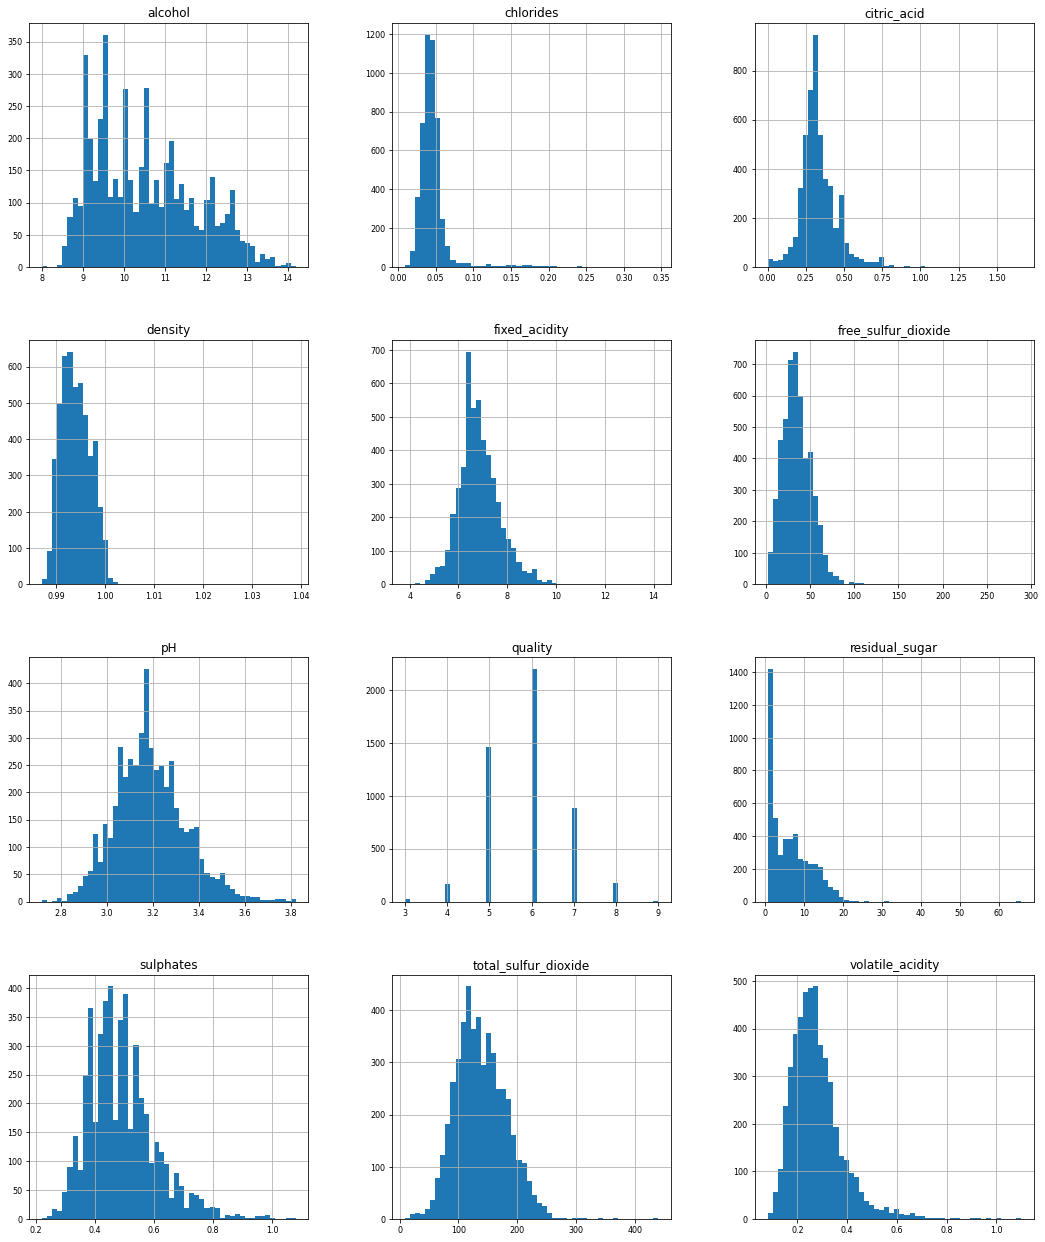

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.corr()['quality'][:-1]

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

In [ ]:
corr = dataset.corr()

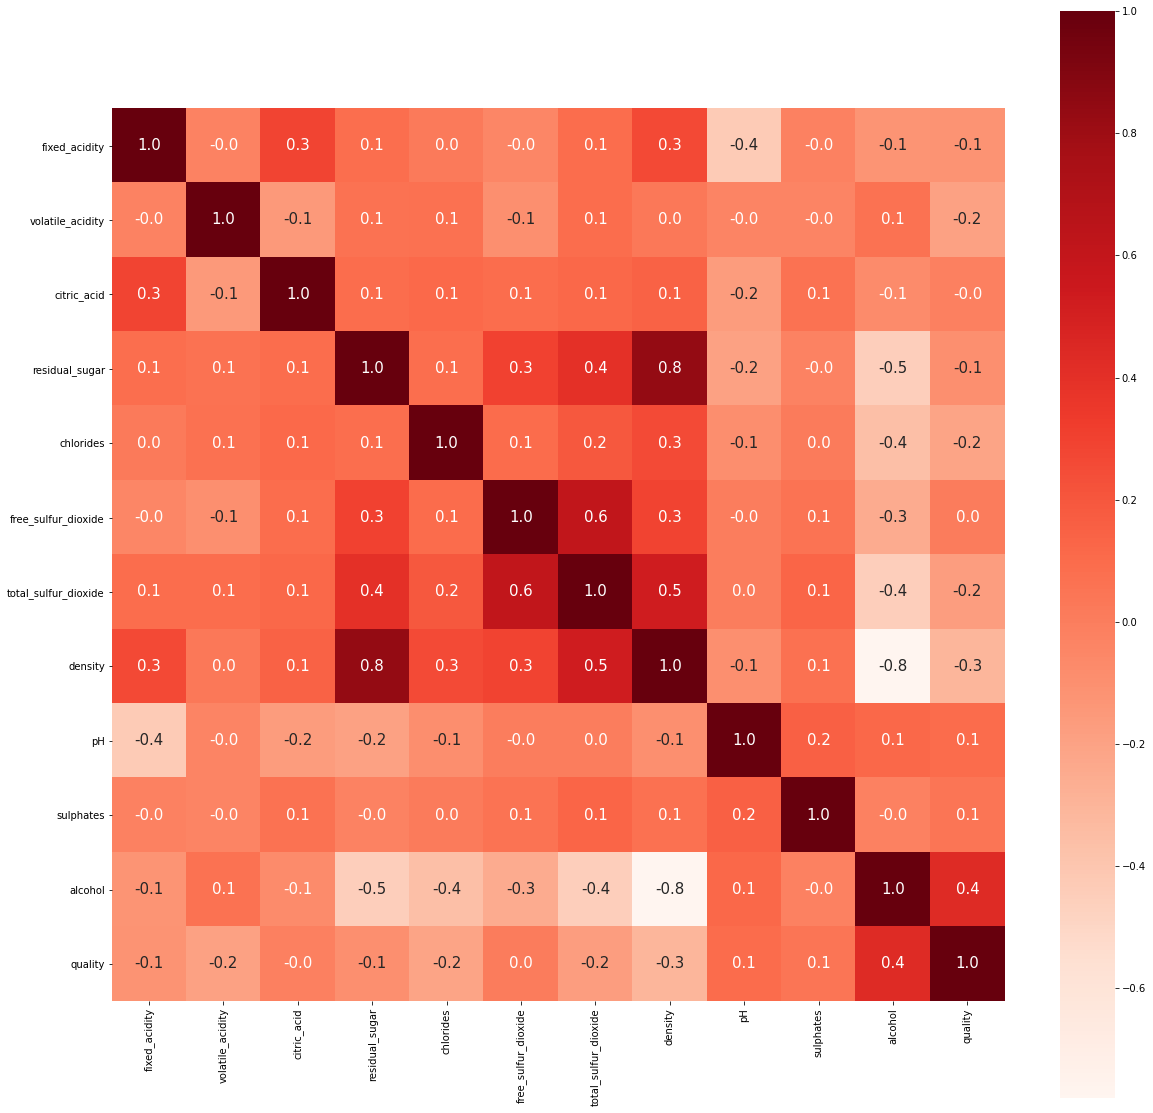

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [ ]:
Y = dataset['quality'] #label
x = dataset.drop(['quality'], axis=1) #features

In [ ]:
def acc_scaler(arr_name, arr_scl):
  # scaler = arr_scl
  X = arr_scl.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(x_train, y_train)
  y_pred = lm.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(arr_name)
  print()
  print('Accuracy of ',arr_name,' on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
  print('Accuracy of ',arr_name,' on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
  print()
  print("MSE (Mean Squared Error)                   :", mse)
  print("MAE (Mean Absolute Error)                  :", mae)
  print("r^2 score                                  :", r2)
  print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('====================================================================')

arr_scl=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
arr_name=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(arr_scl)):
  acc_scaler(arr_name[a], arr_scl[a])

Standar Scaler

Accuracy of  Standar Scaler  on train set : 0.28
Accuracy of  Standar Scaler  on test set  : 0.29

MSE (Mean Squared Error)                   : 0.5548832994203517
MAE (Mean Absolute Error)                  : 0.5804267647459413
r^2 score                                  : 0.2894540453148069
RMSE (Root Mean Squared Error)             : 0.7449048928691178
Power Transformer Yeo Johnson

Accuracy of  Power Transformer Yeo Johnson  on train set : 0.28
Accuracy of  Power Transformer Yeo Johnson  on test set  : 0.29

MSE (Mean Squared Error)                   : 0.5532974274429229
MAE (Mean Absolute Error)                  : 0.5801503621875661
r^2 score                                  : 0.29148480551138845
RMSE (Root Mean Squared Error)             : 0.7438396517011734
Quantile Transformer

Accuracy of  Quantile Transformer  on train set : 0.30
Accuracy of  Quantile Transformer  on test set  : 0.30

MSE (Mean Squared Error)                   : 0.5499064978106402
MAE (Mean Absol

Dari Berbagai Model Scaler yang digunakan terdapat 3 model yg memiliki hasil yang sama, baik itu nilai r2, MAE, MSE, maupun RMSE nya yaitu model Min Max Scaler, Max Abs Scaler dan Robust Scaler. untuk nilai r2 yang paling baik, didapat oleh model Quantile Transformer dengan nilai 0.2958270002311747. ini menunjukan bahwa nilai yang didapat semuanya memiliki akurasi yang rendah

***Untuk Power Transformer Metode Box-Cox akan menghasilkan error seperti dibawah***

In [ ]:
scaler = PowerTransformer(method='box-cox', standardize=True)
X = scaler.fit_transform(x) #x=features
data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Box-Cox Transformation")
print()
print('Accuracy of box-cox on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of box-cox on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
print()
print("MSE (Mean Squared Error)                   :", mse)
print("MAE (Mean Absolute Error)                  :", mae)
print("r^2 score                                  :", r2)
print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))

ValueError: ignored

*Error ini disebakan karena **Box-Cox Transformation** hanya dapat digunakan untuk data yang benar benar positif, sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. Dengan demikian, jika memang ingin menggunakan metode ini, maka harus dilakukan data cleaning. namun menurut saya dalam kasus ini kita tidak dapat menggunakan **Box-Cox Transformation** karena terdapat nilai 0 didalam quality wine.

**Soal nomor 2**

**Random Forest Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_rstatm=[]


  def random_param(est,rstat):
    rf = RandomForestRegressor(n_estimators=est,random_state=rstat)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\trandom forest n_estimasi = ',est,'dan random_state = ',rstat)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_rstatm.append(rstat)

  arr_est=[50,100,200]
  arr_rstat=[0,10,15,20]
  for i in arr_est:
    for j in arr_rstat:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model random forest dengan n_estimasi',arr_estm[i],'dan random_state',arr_rstatm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 10
dengan nilai r2 sebesar:  0.5528260679884219
dan dengan RMSE sebesar:  0.5909394457737853
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 15
dengan nilai r2 sebesar:  0.5538908958797688
dan dengan RMSE sebesar:  0.5902354424727647
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 10
dengan nilai r2 sebesar:  0.5533950424362304
dan dengan RMSE

Disini hasil yang saya dapatkan tidak jauh berbeda untuk setiap metode scaling pada random forest regressor, untuk hasil yg lebih baik adalah pada metode scaling Min Max Scaler yang sedikit lebih unggul dibandingkan dengan model scaling lainnya yaitu 0.5545954238119051 dan RMSE sebesar 0.5897691869515997 dengan n_estimasi 200 dan random_state 15

**XGBoost**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_lratem=[]


  def random_param(est,lrate):
    xr = xgb.XGBRegressor(n_estimators=est,learning_rate=lrate,objective ='reg:squarederror')
    xr.fit(x_train, y_train)
    y_pred = xr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tXGB Regressor n_estimasi = ',est,'dan learning_rate = ',lrate)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_lratem.append(lrate)

  arr_est=[50,100,200]
  arr_lrate=[0.01,0.05,0.1,0.5]
  for i in arr_est:
    for j in arr_lrate:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi',arr_estm[i],'dan learning_rate',arr_lratem[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.4196932978601806
dan dengan RMSE sebesar:  0.6731836112917648
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.41725781974540777
dan dengan RMSE sebesar:  0.6745947679483544
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.41991729022787616
dan den

Disini hasil yang saya dapatkan tidak jauh berbeda untuk setiap metode scaling pada XGBRegressor, untuk hasil yg lebih baik adalah pada metode scaling Robust Scaler yang sedikit lebih unggul dibandingkan dengan model scaling lainnya yaitu r2 sebesar 0.4199256173641098 dan RMS sebesar 0.6730488469181888 dengan n_estimasi 200 dan learning_rate 0.1

**SVM Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(krnl):
    svmr = SVR(kernel=krnl)
    svmr.fit(x_train, y_train)
    y_pred = svmr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tSVR dengan kernel = ',krnl)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(krnl)

  arr_kernel=['rbf','poly','linear']
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model SVM dengan kernel',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel rbf
dengan nilai r2 sebesar:  0.3912033775056929
dan dengan RMSE sebesar:  0.6895104593652682
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel rbf
dengan nilai r2 sebesar:  0.3877846164983296
dan dengan RMSE sebesar:  0.6914437579983671
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel rbf
dengan nilai r2 sebesar:  0.3794351707796345
dan dengan RMSE sebesar:  0.6961427753845327
************************************************************************

Untuk SVM Regression saya mendapakan r2 tertinggi, yaitu 0.3912033775056929 pada scaler Standard Scaler, dengan SVM kernel rbf

**KNN Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(knnr):
    knn = KNeighborsRegressor(knnr)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tKNN dengan nilai k = ',knnr)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(knnr)

  arr_kernel=[1,3,5,7,9,11,13,15]
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model SVM dengan kernel',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 9
dengan nilai r2 sebesar:  0.386028507461435
dan dengan RMSE sebesar:  0.6924347336884836
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 11
dengan nilai r2 sebesar:  0.37116774321509616
dan dengan RMSE sebesar:  0.7007645873723662
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 9
dengan nilai r2 sebesar:  0.35733993934975383
dan dengan RMSE sebesar:  0.7084274758478494
****************************************************************************

Untuk KNN Regressor, r2 terbaik yang saya dapatkan adalah 0.3945016366919367 dan RMSE 0.6876401526902256 pada kernel bernilai 3. Scaler yang saya gunakan adalah Min-Max Scaler